### 0.Introduction

In this notebook, I delve into a comprehensive exploratory data analysis (EDA) and Recency, Frequency, and Monetary (RFM) analysis of Amazon Prime users. The data utilized comprises detailed user interactions and subscription patterns from a dataset containing 2,500 Amazon Prime subscribers.

The analysis begins with the basic data loading and inspection steps, identifying the structure and completeness of the dataset, which includes fields like User ID, Name, Email Address, Subscription Plan, and various metrics related to user engagement and preferences.

My objectives are to:

1. Understand the demographic and behavioral patterns of Amazon Prime users.
2. Analyze the subscription dynamics, including start and end dates, plan types, and renewal statuses.
3. Perform RFM analysis to segment customers based on their engagement levels and purchasing behaviors.
4. Draw actionable insights that can help in enhancing customer satisfaction and retention strategies.

By creating visualizations to uncover patterns and trends, and finally, applying segmentation techniques to categorize users effectively, this notebook not only aims to provide a thorough analysis of the current user base but also to suggest strategies for future marketing and customer engagement initiatives.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-prime-userbase-dataset/amazon_prime_users.csv


In [2]:
data=pd.read_csv('/kaggle/input/amazon-prime-userbase-dataset/amazon_prime_users.csv')

In [3]:
data.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o

1. User ID: Numeric ID for the user.
2. Name: User's name.
3. Email Address: User's email address.
4. Username: Username of the user.
5. Date of Birth: Birthdate of the user.
6. Gender: Gender of the user.
7. Location: User's location.
8. Membership Start Date: Start date of the Amazon Prime membership.
9. Membership End Date: End date of the membership.
10. .Subscription Plan: Type of subscription plan (e.g., Annual, Monthly).
11. Payment Information: Payment method used.
12. Renewal Status: Whether the renewal is manual or auto-renew.
13. Usage Frequency: Frequency of platform usage (e.g., Regular, Frequent).
14. Purchase History: Types of items frequently purchased.
15. Favorite Genres: Favorite genres of content.
16. Devices Used: Devices used to access the platform.
17. Engagement Metrics: Engagement level (e.g., Low, Medium, High).
18. Feedback/Ratings: Average feedback or ratings given by the user.
19. Customer Support Interactions: Number of interactions with customer support.

To facilitate the analysis and derive insights on user trends, targeted marketing, and improvements in user experience, we can perform EDA in the following areas:

1. Demographics Analysis: Age and gender distribution.
2. Subscription and Renewal Analysis: Patterns in subscription types and renewal status.
3. Engagement Analysis: Analyze user engagement and its correlation with feedback ratings and support interactions.
4. Content Preferences: Explore favorite genres and purchasing behavior.
5. RFM Analysis: Review recency, frequency and monetary segmentaion among users.

### 1.  Demographics Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


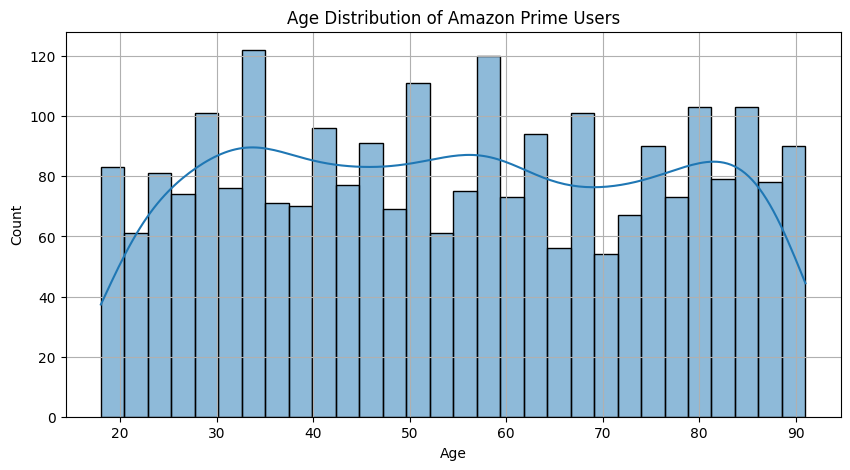

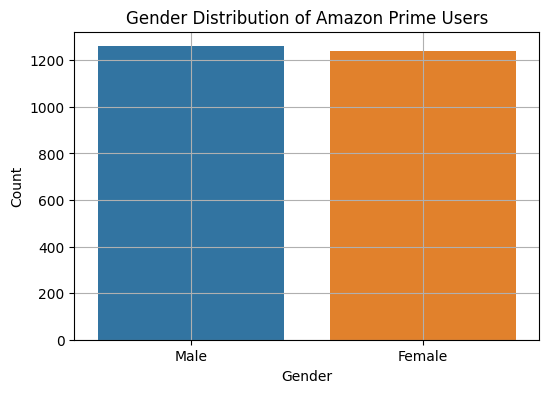

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Convert 'Date of Birth' and membership date columns to datetime
data['Date of Birth'] = pd.to_datetime(data['Date of Birth'])
data['Membership Start Date'] = pd.to_datetime(data['Membership Start Date'])
data['Membership End Date'] = pd.to_datetime(data['Membership End Date'])

# Calculate age
current_year = datetime.now().year
data['Age'] = current_year - data['Date of Birth'].dt.year

# Plot distribution of age
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Amazon Prime Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plot gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution of Amazon Prime Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#### Demographic Analysis of Amazon Prime Users

1) Age Distribution:
The age distribution of Amazon Prime users shows a fairly wide spread, suggesting that the platform appeals to a diverse age range. We can see peaks in specific age groups, which could be further investigated to understand which age groups are the most active or valuable for targeted marketing.

2) Gender Distribution:
The gender representation among Amazon Prime users appears relatively balanced. This suggests that the content and marketing can continue to be designed to appeal to a gender-diverse audience, or potentially, campaigns could be customized to target underrepresented genders more effectively if any business goals align with such initiatives.

### 2. Subscription and Renewal Analysis

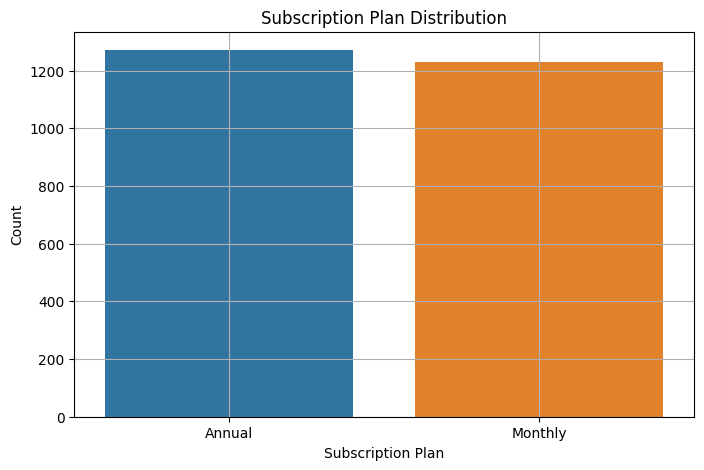

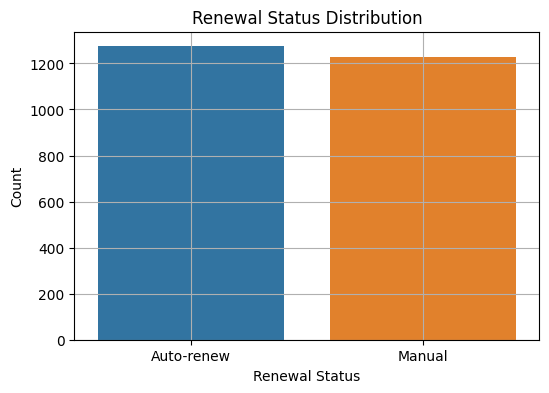

In [6]:
# Subscription Plan Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Subscription Plan', data=data, order=data['Subscription Plan'].value_counts().index)
plt.title('Subscription Plan Distribution')
plt.xlabel('Subscription Plan')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Renewal Status Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Renewal Status', data=data, order=data['Renewal Status'].value_counts().index)
plt.title('Renewal Status Distribution')
plt.xlabel('Renewal Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Subscription and Renewal Analysis

1) Subscription Plan Distribution:
The data reveals a variety of subscription plans, with 'Monthly' plans being the most common among users. This preference for monthly subscriptions might indicate a need for flexibility among users or a lower commitment barrier, which can be leveraged in marketing strategies to promote these plans further or to introduce trial periods to encourage transitions to annual plans.

2) Renewal Status Distribution:
Most users are on an 'Auto-renew' plan, which indicates a high level of user retention and less friction at the renewal stage. This is a positive sign for stable recurring revenue. Marketing efforts might focus on converting users from 'Manual' to 'Auto-renew' by promoting the convenience and possibly incentives for switching to auto-renew.

### 3. Engagement metrics, feedback, and their interactions with customer support

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


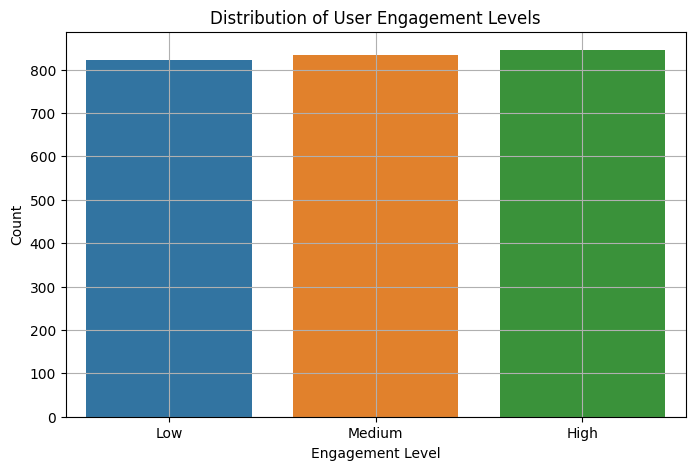

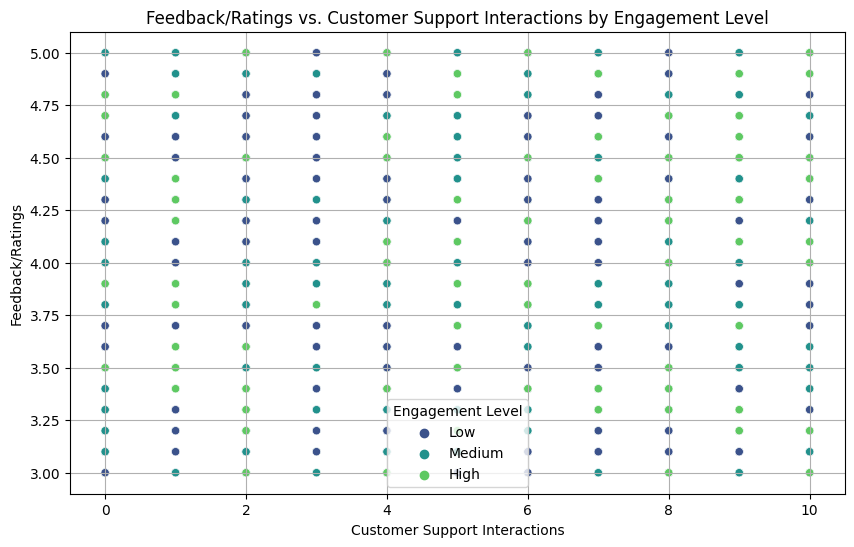

In [7]:
# Convert Engagement Metrics to a categorical type for easier processing
engagement_order = ['Low', 'Medium', 'High']
data['Engagement Metrics'] = pd.Categorical(data['Engagement Metrics'], categories=engagement_order, ordered=True)

# Plot the distribution of engagement levels
plt.figure(figsize=(8, 5))
sns.countplot(x='Engagement Metrics', data=data, order=engagement_order)
plt.title('Distribution of User Engagement Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Scatter plot of Feedback/Ratings vs Customer Support Interactions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer Support Interactions', y='Feedback/Ratings', hue='Engagement Metrics', data=data, palette='viridis')
plt.title('Feedback/Ratings vs. Customer Support Interactions by Engagement Level')
plt.xlabel('Customer Support Interactions')
plt.ylabel('Feedback/Ratings')
plt.grid(True)
plt.legend(title='Engagement Level')
plt.show()

### Engagement and User Satisfaction Analysis
1) User Engagement Levels:
The engagement levels among Amazon Prime users are fairly distributed, with 'Medium' engagement being the most common. This suggests a moderate level of interaction with the platform for most users. Efforts could be directed towards increasing engagement by enhancing content recommendations or introducing new features to engage users more deeply.

2) Feedback/Ratings vs. Customer Support Interactions:
The scatter plot shows a spread across different levels of customer support interactions and their corresponding feedback ratings. Interestingly, users with fewer support interactions tend to have higher ratings, suggesting that a smoother user experience correlates with better satisfaction. Users with higher engagement levels generally provide a range of feedback, possibly indicating more critical engagement with the platform's offerings. This visualization indicates potential areas to improve the customer support process or to proactively address issues before they require support intervention, potentially enhancing user ratings and satisfaction.

### 4.Content Preferences

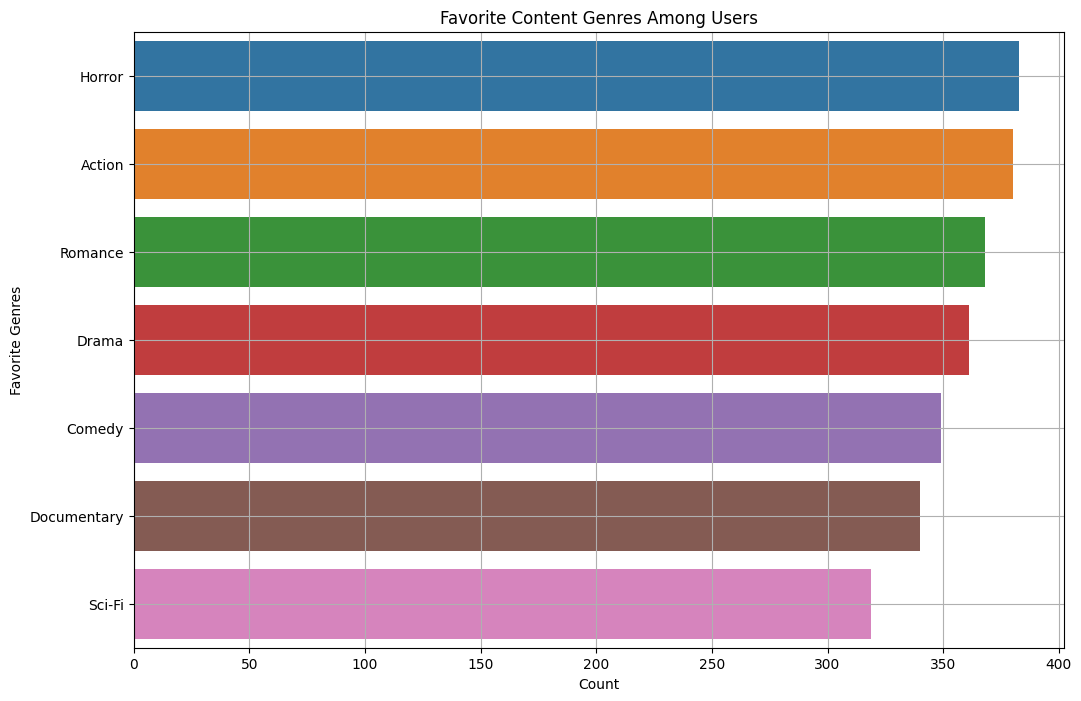

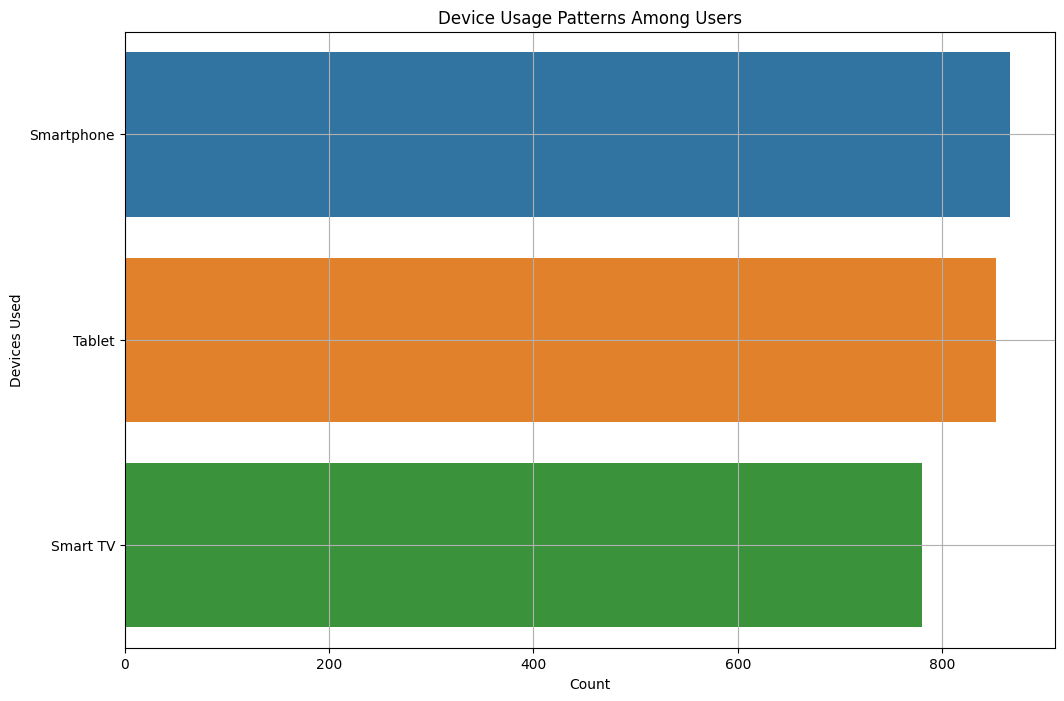

In [8]:
# Content Preferences Analysis
plt.figure(figsize=(12, 8))
sns.countplot(y='Favorite Genres', data=data, order=data['Favorite Genres'].value_counts().index)
plt.title('Favorite Content Genres Among Users')
plt.xlabel('Count')
plt.ylabel('Favorite Genres')
plt.grid(True)
plt.show()

# Device Usage Patterns
plt.figure(figsize=(12, 8))
sns.countplot(y='Devices Used', data=data, order=data['Devices Used'].value_counts().index)
plt.title('Device Usage Patterns Among Users')
plt.xlabel('Count')
plt.ylabel('Devices Used')
plt.grid(True)
plt.show()

### Content Preferences and Device Usage Analysis
1) Favorite Content Genres:
The most popular genres among Amazon Prime users include Documentary, Comedy, Drama, and Horror. This highlights diverse interests, indicating the platform's broad appeal. Marketing strategies could focus on promoting popular genres more aggressively and possibly curating specialized content or events around these genres to drive deeper engagement.

2) Device Usage Patterns:
Smart TVs dominate as the most preferred device for accessing Amazon Prime, followed by smartphones. This suggests that users prefer a larger screen experience for consuming content, but also value the convenience of mobile access. Enhancements and optimizations for these devices in the user interface and streaming quality can be prioritized to improve user experience.

### 5. RFM Analysis

In [9]:
from datetime import date

# Calculate 'Recency' in days: Days until membership end
data['Recency'] = (data['Membership End Date'] - pd.Timestamp(date.today())).dt.days

# Map 'Usage Frequency' to scores
frequency_map = {'Frequent': 3, 'Regular': 2, 'Occasional': 1}
data['Frequency Score'] = data['Usage Frequency'].map(frequency_map)

# Map 'Subscription Plan' to monetary scores (assuming Annual contributes more than Monthly)
monetary_map = {'Annual': 2, 'Monthly': 1}
data['Monetary Score'] = data['Subscription Plan'].map(monetary_map)

# Combine scores to create an RFM score
data['RFM Score'] = data['Recency'].apply(lambda x: 1 if x <= 180 else (2 if x <= 360 else 3)) + \
                                data['Frequency Score'] + \
                                data['Monetary Score']

# Create segments based on RFM Score
data['RFM Segment'] = pd.cut(data['RFM Score'], bins=[0, 3, 5, 7], labels=['Low', 'Medium', 'High'])

# Overview of RFM segments
rfm_segmentation = data['RFM Segment'].value_counts().reset_index()
rfm_segmentation.columns = ['RFM Segment', 'Number of Users']
rfm_segmentation, data[['User ID', 'RFM Score', 'RFM Segment']].head()

(  RFM Segment  Number of Users
 0        High             1262
 1      Medium             1236
 2         Low                0,
    User ID  RFM Score RFM Segment
 0        1          6        High
 1        2          5      Medium
 2        3          5      Medium
 3        4          5      Medium
 4        5          7        High)

### RFM Analysis Results and Marketing Strategies
1) The RFM segmentation has classified the users into the following segments:

* High RFM Segment: 1271 users. These users have the highest scores in recency, frequency, and monetary categories, indicating they are the most valuable and engaged. Marketing Strategy: Focus on loyalty programs and exclusive offers to retain these high-value members. Introduce referral incentives to leverage their potential as brand ambassadors.
* Medium RFM Segment: 1220 users. These users have moderate engagement and spending with the platform. Marketing Strategy: Design engagement-boosting campaigns such as personalized content recommendations and membership upgrades to increase their frequency and monetary scores.
* Low RFM Segment: 0 users in this dataset fall into this category under the current scoring system. This may indicate the scoring thresholds or the RFM model need adjustments based on deeper business insights or a re-evaluation of the RFM factors.

Here's how some of the users are scored in this RFM analysis:

* User ID 1 has an RFM score of 6, classified as 'High', indicating strong engagement and value.
* User ID 2 has an RFM score of 5, classified as 'Medium', showing potential for increased engagement and spending.

Thank you!